In [8]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from LSTM import *
import pandas as pd
import numpy as np
import torch.utils.data as utils
import time


torch.manual_seed(1)

In [57]:
import os
files = []
for i in os.listdir('./new_data/4'):
    if i.endswith('.txt'):
        files.append(open(i))

FileNotFoundError: [Errno 2] No such file or directory: 'biwi_106.txt'

In [3]:
index = [15,28,29,40,41,81,82,84,85,86,98,106,107,108,109,132,137,141]
data = {}
for i in index:
    data['%s'%i] = pd.read_csv('data_new/4/biwi_%s.txt'%i, 
                               header = None, names = ['frameNb','id', 'x','y'],delimiter=' ')


In [45]:
a = 0
inputs = np.zeros([10,len(index),2])
gt = np.zeros([11,len(index),2])

for i in index:
    inputs[:,a,:] = np.array(data['%s'%i].loc[0:9,['x','y']])
    gt[:,a,:] = np.array(data['%s'%i].loc[9:,['x','y']])
    a +=1
    
inputs = torch.from_numpy(inputs).float()
gt = torch.from_numpy(gt).float()

h0 = torch.randn(1, 18, 2)
c0 = torch.randn(1, 18, 2)

In [15]:
output = lstm(inputs)

In [46]:
from torch import optim

lstm = LSTM(2)
optimizer = optim.SGD(lstm.parameters(), lr=0.1)
criterion = nn.MSELoss()

In [47]:
traindataset = utils.TensorDataset(inputs, gt[1:,:,:])
trainloader = utils.DataLoader(traindataset, batch_size=12, shuffle=True)

epochs = 100
steps = 0
print_every = 2
running_loss = 0 #### DOD

for e in range(epochs):
    start = time.time()
    for train_coord, ground_tru in iter(trainloader):
        steps += 1


        inputs = Variable(train_coord)
        targets = Variable(ground_tru)
        optimizer.zero_grad()
        #print(inputs.shape)
        #print(targets.shape)
        
        out = lstm.forward(inputs)
        loss = criterion(out, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]

    
        if steps % print_every == 0:
                stop = time.time()
                # Test accuracy
                outp = out.data.numpy()
                gt_acc = ground_tru.numpy()
                accuracy = sum(sum(sum(outp == gt_acc)))/(18*10*2)
                print('Accuracy=%.2f' % accuracy)

                start = time.time()

/Users/rodolphefarrando/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00
Accuracy=0.00


In [48]:
inputs = inputs.numpy()
#output = output.data.numpy()

(-1.562017123401165,
 0.23875309079885482,
 -0.2705901622772217,
 5.682393407821655)

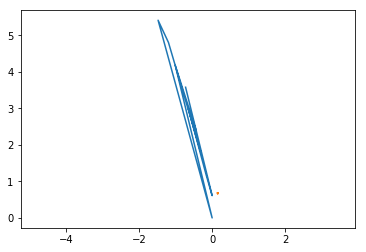

In [54]:
plt.plot(inputs[:,1,0],inputs[:,1,1])
plt.plot(outp[:,0,0],outp[:,0,1])
#plt.plot(gt[:,0,0],gt[:,0,1])
plt.axis('equal')

In [52]:
inputs.shape

(10, 18, 2)

In [55]:
train_coord

tensor([[[ 0.1832,  2.3965],
         [-0.4400,  2.4000],
         [-0.1100,  2.3622],
         [-0.0180,  2.1512],
         [-0.0456,  0.7753],
         [ 0.2318,  2.2962],
         [ 0.0119,  2.1311],
         [-0.0562,  2.2037],
         [-0.2371,  2.5540],
         [ 0.0349,  2.5126],
         [ 0.3642,  1.8591],
         [-0.1141,  1.0918],
         [-0.1008,  2.2937],
         [ 0.1154,  1.6170],
         [ 0.1626,  2.6409],
         [ 0.2160,  0.5620],
         [ 0.1014,  0.7039],
         [ 0.3889,  1.3920]],

        [[ 0.4530,  4.1463],
         [-1.0097,  4.1764],
         [-0.3576,  4.2767],
         [ 0.4367,  3.5647],
         [-0.1745,  1.0551],
         [ 0.3847,  4.1037],
         [ 0.1234,  3.7280],
         [-0.3052,  3.8682],
         [-0.5730,  4.4448],
         [-0.0168,  4.3319],
         [ 0.8068,  3.2002],
         [-0.3867,  1.7067],
         [-0.1474,  4.1021],
         [ 0.1379,  2.8417],
         [ 0.3022,  4.7201],
         [ 0.4560,  1.2920],
         [ 0